## Notebook Tutorial

This file goes through the functions in FLUTE tool in an elaborative and interactive manner using notebook.

In [1]:
# Set up package and function imports
import sys,os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'src')))

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
import time
import run_FLUTE

In [2]:
# Fill in username and password, as well as the configurations of flute database
db_name = "flute"
db_host = "localhost"
db_user = "root"
db_password = "12345678"

### Using FLUTE to filter interactions

In [3]:
input_file = 'input/example.xlsx'

In [4]:
df = pd.read_excel(input_file)
df = df.fillna('').astype(str)
interaction_df = df[['Regulated Name', 'Regulated ID', 'Regulated Type', 'Regulator Name', 'Regulator ID', 'Regulator Type', 'Paper IDs']]

Let's take a look at all the information we would use from input interactions

In [5]:
interaction_df

,Regulated Name,Regulated ID,Regulated Type,Regulator Name,Regulator ID,Regulator Type,Paper IDs
0,CD4,P01730,Protein,Anti-CD4,UAZ616E74692D434434,Other,PMC7749301
1,CD4,P01730,Protein,anti-CD8 mAbs,UAZ616E74692D434438206D416273,Other,PMC7749301
2,CD8,CD8,Other,rapamycin,5284616,Chemical,PMC7749301
3,acidification,GO:0045851,Biological Process,CD8,CD8,Other,PMC7749301
4,acidification,GO:0045851,Biological Process,transduction,GO:0009293,Biological Process,PMC7749301
...,...,...,...,...,...,...,...
14383,T-cell activation,GO:0042110,Biological Process,CD8,CD8,Other,PMC7214244
14384,calcium,5460341,Chemical,cyclophilin,Cyclophilin,Other,PMC7214244
14385,cytokine production,GO:0001816,Biological Process,CD8,CD8,Other,PMC7214244
14386,transduction,GO:0009293,Biological Process,CAR,P36575,Protein,PMC7214244


In [6]:
# Make an utility dataframe
id_name1 = df[['Regulated ID', 'Regulated Name']].rename(
            columns={'Regulated ID': 'ID', 'Regulated Name': 'Name'})
id_name2 = df[['Regulator ID', 'Regulator Name']].rename(
            columns={'Regulator ID': 'ID', 'Regulator Name': 'Name'})
id_name_df = pd.concat([id_name1, id_name2], ignore_index=True)
id_name_df['ID'] = id_name_df['ID'].astype(str).str.slice(0, 50)
id_name_df['Name'] = id_name_df['Name'].astype(str).str.slice(0, 50)
id_name_df = id_name_df.drop_duplicates(subset='ID')

In [7]:
# Ground the utility dataframe to find out stringID information for each species
query = run_FLUTE.Query(db_user, db_password, db_host, db_name)
id_name_df = query.ground_string_id(id_name_df)

This DataFrame contains all the studies species in the input file, listed by their IDs, names, and stringIDs

In [8]:
id_name_df

,ID,Name,stringID
0,P01730,CD4,9606.ENSP00000011653
2,CD8,CD8,NaN
3,GO:0045851,acidification,NaN
5,GO:0016049,cell growth,NaN
6,GO:0009293,transduction,NaN
...,...,...,...
28755,UAZ42434D41784344332062734162,BCMAxCD3 bsAb,NaN
28760,UAZ4D4E442DCE94572064756F434152,MND-ΔW duoCAR,NaN
28766,UAZ64756F434152.t,duoCAR,NaN
28772,Cyclophilin,cyclophilin,NaN


In [9]:
# Return interactions that involves a protein:ppis/pcis/pbpis
pt_only_ints = run_FLUTE.filter_protein_ints(interaction_df)
pt_only_ints

,Regulated Name,Regulated ID,Regulator Name,Regulator ID
0,cd4,P01730,anti-cd4,UAZ616E74692D434434
1,cd4,P01730,anti-cd8 mabs,UAZ616E74692D434438206D416273
2,cd4,P01730,cell growth,GO:0016049
3,ifn,Interferon,type,Q13326
4,cell viability,D002470,type,Q13326
...,...,...,...,...
9930,env,P03386,gfp,IPR011584
9931,aes,Q08117,amg,Q99217
9932,bcma,Q02223,april,O75888
9933,dna modification,GO:0006304,car,P36575


In [10]:
# Fill out CIDm information
pt_only_ints = run_FLUTE.get_chem_id(pt_only_ints)
pt_only_ints

,Regulated Name,Regulated ID,Regulator Name,Regulator ID,Regulated CIDm,Regulator CIDm
0,cd4,P01730,anti-cd4,UAZ616E74692D434434,NaN,NaN
1,cd4,P01730,anti-cd8 mabs,UAZ616E74692D434438206D416273,NaN,NaN
2,cd4,P01730,cell growth,GO:0016049,NaN,NaN
3,ifn,Interferon,type,Q13326,NaN,NaN
4,cell viability,D002470,type,Q13326,NaN,NaN
...,...,...,...,...,...,...
9930,env,P03386,gfp,IPR011584,NaN,NaN
9931,aes,Q08117,amg,Q99217,NaN,NaN
9932,bcma,Q02223,april,O75888,NaN,NaN
9933,dna modification,GO:0006304,car,P36575,NaN,NaN


In [11]:
# Fill out GoID information
pt_only_ints = run_FLUTE.get_go_id(pt_only_ints)
pt_only_ints

,Regulated Name,Regulated ID,Regulator Name,Regulator ID,Regulated CIDm,Regulator CIDm,Regulated GoID,Regulator GoID
0,cd4,P01730,anti-cd4,UAZ616E74692D434434,NaN,NaN,NaN,NaN
1,cd4,P01730,anti-cd8 mabs,UAZ616E74692D434438206D416273,NaN,NaN,NaN,NaN
2,cd4,P01730,cell growth,GO:0016049,NaN,NaN,NaN,GO:0016049
3,ifn,Interferon,type,Q13326,NaN,NaN,NaN,NaN
4,cell viability,D002470,type,Q13326,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9930,env,P03386,gfp,IPR011584,NaN,NaN,NaN,NaN
9931,aes,Q08117,amg,Q99217,NaN,NaN,NaN,NaN
9932,bcma,Q02223,april,O75888,NaN,NaN,NaN,NaN
9933,dna modification,GO:0006304,car,P36575,NaN,NaN,GO:0006304,NaN


In [12]:
# Fill out stringID information
pt_only_ints = run_FLUTE.get_string_id(pt_only_ints, id_name_df)
pt_only_ints

,Regulated Name,Regulated ID,Regulator Name,Regulator ID,Regulated CIDm,Regulator CIDm,Regulated GoID,Regulator GoID,Regulated stringID,Regulator stringID
0,cd4,P01730,anti-cd4,UAZ616E74692D434434,NaN,NaN,NaN,NaN,9606.ENSP00000011653,NaN
1,cd4,P01730,anti-cd8 mabs,UAZ616E74692D434438206D416273,NaN,NaN,NaN,NaN,9606.ENSP00000011653,NaN
2,cd4,P01730,cell growth,GO:0016049,NaN,NaN,NaN,GO:0016049,9606.ENSP00000011653,NaN
3,ifn,Interferon,type,Q13326,NaN,NaN,NaN,NaN,NaN,9606.ENSP00000218867
4,cell viability,D002470,type,Q13326,NaN,NaN,NaN,NaN,NaN,9606.ENSP00000218867
...,...,...,...,...,...,...,...,...,...,...
9930,env,P03386,gfp,IPR011584,NaN,NaN,NaN,NaN,NaN,NaN
9931,aes,Q08117,amg,Q99217,NaN,NaN,NaN,NaN,9606.ENSP00000221561,9606.ENSP00000370088
9932,bcma,Q02223,april,O75888,NaN,NaN,NaN,NaN,9606.ENSP00000053243,9606.ENSP00000343505
9933,dna modification,GO:0006304,car,P36575,NaN,NaN,GO:0006304,NaN,NaN,9606.ENSP00000311538


In [13]:
# Fill out UID information
pt_only_ints = run_FLUTE.get_uid(pt_only_ints)
pt_only_ints

,Regulated Name,Regulated ID,Regulator Name,Regulator ID,Regulated CIDm,Regulator CIDm,Regulated GoID,Regulator GoID,Regulated stringID,Regulator stringID,Regulated UID,Regulator UID
0,cd4,P01730,anti-cd4,UAZ616E74692D434434,NaN,NaN,NaN,NaN,9606.ENSP00000011653,NaN,P01730,NaN
1,cd4,P01730,anti-cd8 mabs,UAZ616E74692D434438206D416273,NaN,NaN,NaN,NaN,9606.ENSP00000011653,NaN,P01730,NaN
2,cd4,P01730,cell growth,GO:0016049,NaN,NaN,NaN,GO:0016049,9606.ENSP00000011653,NaN,P01730,NaN
3,ifn,Interferon,type,Q13326,NaN,NaN,NaN,NaN,NaN,9606.ENSP00000218867,NaN,Q13326
4,cell viability,D002470,type,Q13326,NaN,NaN,NaN,NaN,NaN,9606.ENSP00000218867,NaN,Q13326
...,...,...,...,...,...,...,...,...,...,...,...,...
9930,env,P03386,gfp,IPR011584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9931,aes,Q08117,amg,Q99217,NaN,NaN,NaN,NaN,9606.ENSP00000221561,9606.ENSP00000370088,Q08117,Q99217
9932,bcma,Q02223,april,O75888,NaN,NaN,NaN,NaN,9606.ENSP00000053243,9606.ENSP00000343505,Q02223,O75888
9933,dna modification,GO:0006304,car,P36575,NaN,NaN,GO:0006304,NaN,NaN,9606.ENSP00000311538,NaN,P36575


Now input interactions are narrowed down to contain protein-involved interactions, and each interaction is populated with information including name/ID/UID/CIDm/GoID/stringID for both regulated and regulator element

In [14]:
score_tuple = (0, 0, 0)
pt_scored_ints = query.filter_pt_ints_by_scoring(pt_only_ints, score_tuple)

Using FLUTE tool, you can further filter interactions using the customized score tuple. Here are the scores of these interactions

In [15]:
pt_scored_ints

,Element 1 ID,Element 2 ID,STRING escore,STRING tscore,STRING dscore
0,216239,P08069,180,885,0
1,271,P22001,342,0,0
2,271,P28907,800,163,0
3,784,P04040,690,999,900
4,947,P35548,0,180,0
...,...,...,...,...,...
976,Q9Y5U5,P43489,0,807,0
977,Q9Y5U5,Q07011,0,745,0
978,Q9Y6Q6,P10747,0,152,0
979,UAZ4B693637,Q9NZQ7,0,391,0


Feel free to query the score specifying Element 1&2 IDs

In [16]:
pt_scored_ints[(pt_scored_ints['Element 1 ID']=='P01730')&(pt_scored_ints['Element 2 ID']=='P10747')]

,Element 1 ID,Element 2 ID,STRING escore,STRING tscore,STRING dscore
212,P01730,P10747,336,590,900


We finally obtain the filtration result as the output_df

In [17]:
# Map the scored interactions with original input interactions
# And merge the DataFrames based on the sets and drop the helper columns
pt_scored_ints['set_12'] = pt_scored_ints.apply(lambda row: frozenset([row['Element 1 ID'].lower(), row['Element 2 ID'].lower()]), axis=1)
df['set_dr'] = df.apply(lambda row: frozenset([row['Regulated ID'].lower(), row['Regulator ID'].lower()]), axis=1)
output_df = df.merge(pt_scored_ints, left_on='set_dr', right_on='set_12')
output_df = output_df.drop(columns=pt_scored_ints.columns.tolist() + ['set_dr', ])
output_df = output_df.drop_duplicates()
output_df

,Regulator Name,Regulator Type,Regulator Subtype,Regulator HGNC Symbol,Regulator Database,Regulator ID,Regulator Compartment,Regulator Compartment ID,Regulated Name,Regulated Type,...,Mechanism,Site,Cell Line,Cell Type,Tissue Type,Organism,Score,Source,Statements,Paper IDs
0,4-1BB,Protein,,,,Q07011,,,GITR,Protein,...,NONE,,,cl:CL:0000084,,,,,The Cytotoxic cluster was more like Glycolytic...,PMC9939256
1,IL2RA,Protein,,,,P01589,,,GITR,Protein,...,NONE,,,cl:CL:0000084,,,,,The Cytotoxic cluster was more like Glycolytic...,PMC9939256
2,OX40,Protein,,,,P43489,,,GITR,Protein,...,NONE,,,cl:CL:0000084,,,,,The Cytotoxic cluster was more like Glycolytic...,PMC9939256
3,CD28,Protein,,,,P10747,,,IL-2,Protein,...,NONE,,,cl:CL:0000084 ++++ mesh:D018414,,,,,"In contrast , BAFF-R , CD28 , and TACI showed ...",PMC9939256
5,TACI,Protein,,,,O14836,,,IL-2,Protein,...,NONE,,,cl:CL:0000084 ++++ mesh:D018414,,,,,"In contrast , BAFF-R , CD28 , and TACI showed ...",PMC9939256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,PD-L1,Protein,,,,Q9NZQ7,,,TIM-3,Protein,...,NONE,,,mesh:D018414 ++++ cl:CL:0000084 ++++ cl:CL:000...,,,,,"Furthermore , scFv PD-L1 antibody decreased th...",PMC9961031
1582,PD-L1,Protein,,,,Q9NZQ7,,,immune response,Biological Process,...,NONE,,,cl:CL:0000084,,,,,The PD-1 / PD-L1 pathway downregulates anti-tu...,PMC9961031
1584,CAR,Protein,,,,P36575,,,signaling pathway,Biological Process,...,NONE,,,cl:CL:0000235 ++++ cl:CL:0000084 ++++ cl:CL:00...,,,,,A large body of research has revealed that the...,PMC9961031
1585,PD-L1,Protein,,,,Q9NZQ7,,,IL-2,Protein,...,Secretion,,,cl:CL:0000084 ++++ mesh:D018414 ++++ cl:CL:000...,,,,,"After prolonged cancer cell antigen exposure ,...",PMC9961031


The above functions in this section can be summarized into one query.filtered_input_ints(), with input_file, score_tuple as input parameters and output_path as output parameters. Two files are generated:
- list of reading interactions that pass filtration
- the filtration scores for those filtered interactions

In [18]:
output_path = 'output/example'
score_tuple = (0,0,0)
query.filtered_input_ints(input_file, score_tuple, output_path)

File filtered: input/example.xlsx Time: 46.468547105789185 seconds


### Using FLUTE to analyze a paper set

Unzip the large OA file and put it to input/ directory. Load it to year_df for usage. It contains information of published year, PMCID, PMID of million research papers

In [19]:
!unzip ../supplementary/oa_file_list.txt.zip -d "input/"
year_df = run_FLUTE.extract_year("input/oa_file_list.txt")
!rm "input/oa_file_list.txt"
year_df

Archive:  ../supplementary/oa_file_list.txt.zip
  inflating: input/oa_file_list.txt  


,Year,PMCID,PMID
0,2001,PMC13900,PMID:11250746
1,2001,PMC13901,PMID:11250747
2,2001,PMC13902,PMID:11250748
3,2000,PMC13911,PMID:11056684
4,2000,PMC13912,PMID:11400682
...,...,...,...
2811867,2012,PMC7108457,PMID:21978613
2811868,2007,PMC7108459,PMID:17977063
2811870,2020,PMC7108696,PMID:32160537
2811871,2019,PMC7108792,PMID:31640839


FLUTE offers the function of showing interactions within the same paper set as the input interaction file. Its inclusion of column "Paper IDs" allows such

In [20]:
query = run_FLUTE.Query(db_user, db_password, db_host, db_name)
ints_same_pp = query.get_same_papers_ints(input_file, year_df)
ints_same_pp

array([['9541.XP_005555920.1', '9541.XP_005593605.1', 'activation',
        'PMID018283119'],
       ['9541.XP_005593605.1', '9541.XP_005555920.1', 'activation',
        'PMID018283119'],
       ['10090.ENSMUSP00000029275', '10090.ENSMUSP00000111405',
        'activation', 'PMID018283119'],
       ['10090.ENSMUSP00000111405', '10090.ENSMUSP00000029275',
        'activation', 'PMID018283119']], dtype='<U50')

Take a look at these interactions in the same paper set in a network graph, thanks to networkx package

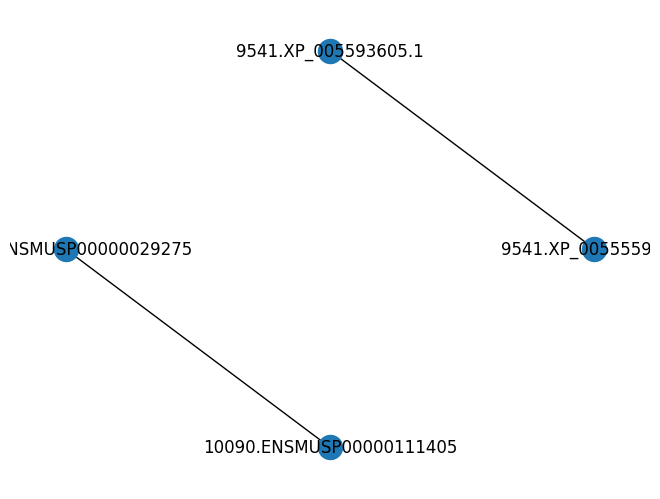

In [21]:
G = nx.from_edgelist(ints_same_pp[:,:2])
nx.draw(G,pos=nx.circular_layout(G),with_labels=True)
plt.show()

### Using FLUTE to query an individual protein

FLUTE also supports the extraction of list of papers that research on certain protein

In [22]:
query_pro = "P00533,P03386"

In [23]:
# get related papers
query = run_FLUTE.Query(db_user, db_password, db_host, db_name)
fq_list = query.get_related_papers(year_df, query_pro)

np.array(fq_list)

array(['PMC1240052', 'PMC1540706', 'PMC1681463', 'PMC1702556',
       'PMC2132490', 'PMC2156182', 'PMC2225448', 'PMC2360392',
       'PMC2575782', 'PMC2742444', 'PMC2756567', 'PMC2824488',
       'PMC3088706', 'PMC3203921', 'PMC3234252', 'PMC3315809',
       'PMC3326441', 'PMC3398014', 'PMC3527276', 'PMC3569983',
       'PMC3730230', 'PMC3767783', 'PMC3952845', 'PMC3965010',
       'PMC4039121', 'PMC4039310', 'PMC4152746', 'PMC4213030',
       'PMC4226707', 'PMC4302072', 'PMC4390223', 'PMC4440518',
       'PMC4615268', 'PMC4724821', 'PMC4741629', 'PMC4791069',
       'PMC4826614', 'PMC5036527', 'PMC5117851', 'PMC5303889',
       'PMC5342422', 'PMC5432325', 'PMC5449203', 'PMC5461031',
       'PMC5531611', 'PMC5641085', 'PMC5648601', 'PMC5715073',
       'PMC5817799', 'PMC5935102', 'PMC5977112', 'PMC5992104',
       'PMC6053247', 'PMC6365915'], dtype='<U10')

Use the function discussed above, interactions inside these papers can be extracted, these interactions somehow relate to the inquired protein

In [24]:
pd.DataFrame(fq_list, columns=['Paper IDs']).to_excel(output_path + '_query_' + query_pro + '.xlsx', index=False)
related_pp = query.get_same_papers_ints(output_path + '_query_' + query_pro + '.xlsx', year_df)
related_pp

array([['7227.FBpp0084623', '7227.FBpp0084626', 'binding',
        'PMID028515276'],
       ['7227.FBpp0084626', '7227.FBpp0084623', 'binding',
        'PMID028515276'],
       ['7227.FBpp0084626', '7227.FBpp0305095', 'binding',
        'PMID028515276'],
       ['7227.FBpp0305095', '7227.FBpp0084626', 'binding',
        'PMID028515276'],
       ['8364.ENSXETP00000021098', '8364.ENSXETP00000061006', 'binding',
        'PMID026344197'],
       ['8364.ENSXETP00000061006', '8364.ENSXETP00000021098', 'binding',
        'PMID026344197'],
       ['9606.ENSP00000175756', '9606.ENSP00000269571', 'ptmod',
        'PMID025081058'],
       ['9606.ENSP00000219070', '9606.ENSP00000301178', 'expression',
        'PMID027775700'],
       ['9606.ENSP00000261739', '9606.ENSP00000275493', 'binding',
        'PMID022298428'],
       ['9606.ENSP00000269571', '9606.ENSP00000175756', 'ptmod',
        'PMID025081058'],
       ['9606.ENSP00000275493', '9606.ENSP00000261739', 'binding',
        'PMID022298428']

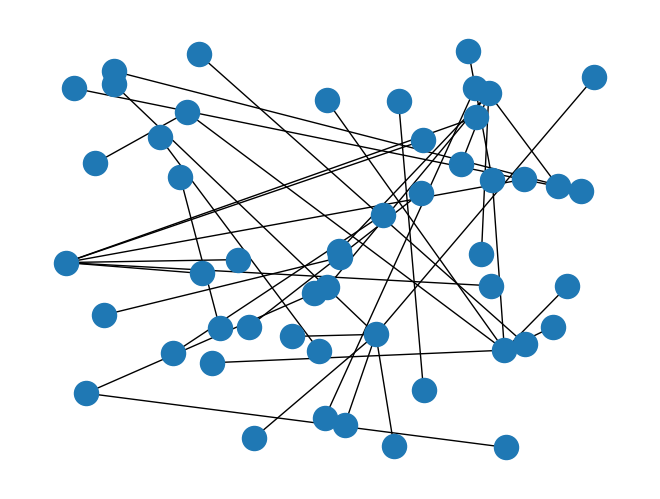

In [25]:
G = nx.from_edgelist(related_pp[:,:2])
nx.draw(G,pos=nx.random_layout(G),with_labels=False)
plt.show()

### Using FLUTE to find recent interactions

In [26]:
# Map the input interaction file with its paper published year
df = pd.read_excel(input_file)
df = df.merge(year_df, left_on='Paper IDs', right_on='PMCID')
df['Year']=df['Year'].astype('int64')
df

,Regulator Name,Regulator Type,Regulator Subtype,Regulator HGNC Symbol,Regulator Database,Regulator ID,Regulator Compartment,Regulator Compartment ID,Regulated Name,Regulated Type,...,Cell Type,Tissue Type,Organism,Score,Source,Statements,Paper IDs,Year,PMCID,PMID
0,CAR,Protein,NaN,NaN,NaN,P36575,NaN,NaN,tumor,Biological Process,...,cl:CL:0000084,NaN,uberon:UBERON:0002015,NaN,NaN,Anti-CAIX CAR T cells secreting anti-PD-L1 ant...,PMC5085160,2016,PMC5085160,PMID:27145284
1,CAR,Protein,NaN,NaN,NaN,P36575,NaN,NaN,ADCC,Biological Process,...,cl:CL:0000084 ++++ cl:CL:0001063,NaN,NaN,NaN,NaN,"Moreover , anti-CAIX CAR T cells secreting the...",PMC5085160,2016,PMC5085160,PMID:27145284
2,IgG1 isoform,Other,NaN,NaN,NaN,UAZ496747312069736F666F726D,NaN,NaN,ADCC,Biological Process,...,cl:CL:0000084 ++++ cl:CL:0000623,NaN,NaN,NaN,NaN,For the anti-CAIX CAR T cells secreting anti-P...,PMC5085160,2016,PMC5085160,PMID:27145284
3,CAR,Protein,NaN,NaN,NaN,P36575,NaN,NaN,CAIX,Protein,...,cl:CL:0000084 ++++ cl:CL:0000623,NaN,NaN,NaN,NaN,The anti-CAIX CAR T cells only produced IL-2 a...,PMC5085160,2016,PMC5085160,PMID:27145284
4,CAIX,Protein,NaN,NaN,NaN,Q16790,NaN,NaN,CAR,Protein,...,cl:CL:0000084 ++++ cl:CL:0000623,NaN,NaN,NaN,NaN,The anti-CAIX CAR T cells only produced IL-2 a...,PMC5085160,2016,PMC5085160,PMID:27145284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,CD4,Protein,NaN,NaN,NaN,P01730,NaN,NaN,IL7,Protein,...,cl:CL:0000084,NaN,NaN,NaN,NaN,The percentage of CD4 CARGD2.28.OX40 ζ T cells...,PMC5980417,2018,PMC5980417,PMID:29872565
3113,ζ,Other,NaN,NaN,NaN,UAZCEB6,NaN,NaN,IL7,Protein,...,cl:CL:0000084,NaN,NaN,NaN,NaN,The percentage of CD4 CARGD2.28.OX40 ζ T cells...,PMC5980417,2018,PMC5980417,PMID:29872565
3114,CAR.GD2,Other,NaN,NaN,NaN,UAZ4341522E474432,NaN,NaN,proliferation,Biological Process,...,cl:CL:0000084 ++++ cl:CL:0000034 ++++ cl:CL:00...,NaN,NaN,NaN,NaN,These cytokines are known to enhance survival ...,PMC5980417,2018,PMC5980417,PMID:29872565
3115,ζ,Other,NaN,NaN,NaN,UAZCEB6,NaN,NaN,IL2,Protein,...,cl:CL:0000084 ++++ cl:CL:0000034 ++++ cl:CL:00...,NaN,NaN,NaN,NaN,"After exposure to GD2 tumor cells , a higher q...",PMC5980417,2018,PMC5980417,PMID:29872565


In [27]:
# Define a number of years
x = 5  # recent 5 years
df = df[df['Year'] >= time.localtime().tm_year - x].drop(columns=year_df.columns)

This DataFrame only contains recent (less than 5 years) interactions published at a known year. The number shrinks a lot compared to original input interaction file

This is useful if users want to exempt these interactions from filtering

In [28]:
df

,Regulator Name,Regulator Type,Regulator Subtype,Regulator HGNC Symbol,Regulator Database,Regulator ID,Regulator Compartment,Regulator Compartment ID,Regulated Name,Regulated Type,...,Mechanism,Site,Cell Line,Cell Type,Tissue Type,Organism,Score,Source,Statements,Paper IDs
13,UniCAR,Other,NaN,NaN,NaN,UAZ556E69434152,NaN,NaN,4-1BB,Protein,...,NONE,NaN,NaN,cl:CL:0000815 ++++ cl:CL:0001063,NaN,NaN,NaN,NaN,"As shown in Figure 4 ( a ) ( middle panel ) , ...",PMC6685520
14,TCR-,Other,NaN,NaN,NaN,TCR,NaN,NaN,proliferation,Biological Process,...,NONE,NaN,NaN,cl:CL:0000815,NaN,NaN,NaN,NaN,To further support the aforementioned findings...,PMC6685520
15,luciferase,Protein,NaN,NaN,NaN,Q01158,NaN,NaN,tumor,Biological Process,...,NONE,NaN,NaN,cl:CL:0000815 ++++ cl:CL:0001063,NaN,NaN,NaN,NaN,In mice transplanted with UniCAR endowed Tconv...,PMC6685520
16,UniCAR,Other,NaN,NaN,NaN,UAZ556E69434152,Other,sl-0487,CD4 CD25 CD127,Other,...,NONE,NaN,NaN,cl:CL:0000084 ++++ cl:CL:0000815,NaN,NaN,NaN,NaN,To investigate responsiveness of UniCAR armed ...,PMC6685520
17,CD3,Other,NaN,NaN,NaN,CD3,NaN,NaN,T cell activation,Biological Process,...,NONE,NaN,NaN,cl:CL:0000084 ++++ cl:CL:0000236,NaN,NaN,NaN,NaN,"Originally , first generation CARs were design...",PMC6685520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3085,mAb,Other,NaN,NaN,NaN,UAZ6D4162,Other,sl-0431,SHP-2,Protein,...,Phosphorylation,NaN,NaN,cl:CL:0000235 ++++ cl:CL:0000236 ++++ cl:CL:00...,NaN,NaN,NaN,NaN,"Functionally , mAb targeting PD-L1 was able to...",PMC6558778
3086,PD-1,Protein,NaN,NaN,NaN,P18621.t,NaN,NaN,PD-L1,Protein,...,Transcription,NaN,cellosaurus:CVCL_1905,mesh:D015496 ++++ cl:CL:0000623 ++++ mesh:D018...,NaN,NaN,NaN,NaN,"Furthermore , lenalidomide , an immunomodulato...",PMC6558778
3087,PD-L1,Protein,NaN,NaN,NaN,Q9NZQ7,Other,sl-0431,SHP-2,Protein,...,Phosphorylation,NaN,NaN,cl:CL:0000235 ++++ cl:CL:0000236 ++++ cl:CL:00...,NaN,NaN,NaN,NaN,"Functionally , mAb targeting PD-L1 was able to...",PMC6558778
3088,mAb,Other,NaN,NaN,NaN,UAZ6D4162,Other,sl-0431,SHP-2,Protein,...,Phosphorylation,NaN,NaN,cl:CL:0000235 ++++ cl:CL:0000236 ++++ cl:CL:00...,NaN,NaN,NaN,NaN,"Functionally , mAb targeting PD-L1 was able to...",PMC6558778


### Using FLUTE to find duplicate interactions

In [29]:
df = pd.read_excel(input_file)

columns_to_check = ['Regulated ID', 'Regulator ID', 'Paper IDs']
duplicates = df[df.duplicated(subset=columns_to_check, keep=False)]
duplicate_counts = duplicates.groupby(columns_to_check).size().reset_index(name='Occurrence')

This DataFrame contains the duplicated interactions (based on Regulated ID, Regulator ID, Paper IDs) of the original input file and their occurrences.

This is helpful when user wants to only keep unique interactions

In [30]:
duplicate_counts.sort_values(by='Occurrence', ascending=False)

,Regulated ID,Regulator ID,Paper IDs,Occurrence
462,Q9NZQ7,Q9NZQ7.t,PMC10098269,8
278,P18621,P31947,PMC8614004,5
319,P29597,P18031,PMC8904293,5
209,P01375,P05231.s,PMC8018404,4
458,Q9NZQ7,P31947,PMC8614004,4
...,...,...,...,...
175,Interferon,P36575,PMC6174845,2
174,Interferon,P01730,PMC3654581,2
173,Interferon,CD8,PMC3654581,2
172,IPR011584,P36575:[SubstitutionMutant],PMC9853244,2
